In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patch
import glob
import os
import numpy as np
from pathlib import Path
from PIL import Image

In [202]:
loc = '/home/onwardhealth/Downloads/BreaKHis_v1/BreakHis_/Train'

In [3]:
ben_img = os.listdir('/home/onwardhealth/Downloads/BreaKHis_v1/BreakHis_/benign/')

In [4]:
mal_img = os.listdir('/home/onwardhealth/Downloads/BreaKHis_v1/BreakHis_/malignant/')

In [86]:
len(ben_img),len(mal_img)

(623, 1390)

In [384]:
all_images = glob.glob(loc+'/**/*.png', recursive=True)

In [8]:
len(all_images)

2013

In [192]:
labels = [0 if 'SOB_B_' in X else 1 for X in all_images]  # 0 = Benign, 1 = Malignant

In [193]:
labels.count(0),labels.count(1)

(623, 1390)

In [12]:
import pandas as pd

In [386]:
all_images1 = [cv2.imread(img) for img in all_images] 
labels1 = [labels]

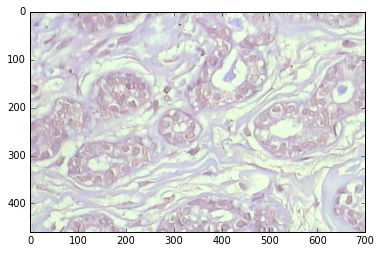

In [393]:
plt.imshow(all_images1[10])

In [395]:
df1 = pd.DataFrame(all_images1,columns = ['Image'])

In [396]:
df2 = pd.DataFrame(labels,columns = ['Labels'])

In [397]:
len(all_images1),len(labels)

(2013, 2013)

In [398]:
df3 = pd.concat([df1,df2], axis=1)

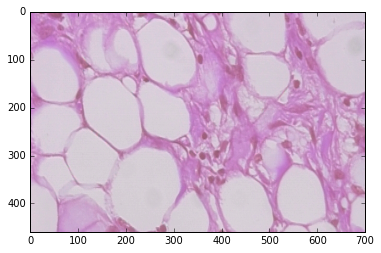

In [401]:
plt.imshow(df3.Image.iloc[1398])

In [402]:
df3['Labels'].value_counts()

1    1390
0     623
Name: Labels, dtype: int64

In [406]:
df3['Image'].dtype

dtype('O')

In [129]:
import tensorflow as tf
from tqdm import tqdm

In [97]:
import keras

Using TensorFlow backend.


In [197]:
def label_img(img):
    #                            [much cat, no dog]
    if 'SOB_B' in img: return [0,1]
    #                             [no cat, very doggo]
    elif 'SOB_M' in img: return [1,0]

In [412]:
from random import shuffle
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(loc)):
        label = label_img(img)
        path = os.path.join(loc,img)
        img = cv2.imread(path)
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    return training_data

In [413]:
train_data = create_train_data()

100%|██████████| 2013/2013 [02:21<00:00, 14.26it/s]


In [282]:
train = train_data[:-1000]
test = train_data[-1000:]

In [414]:
df4 = df3.sample(frac=1)

(<matplotlib.image.AxesImage at 0x7f2fcbd0e0f0>, 1)

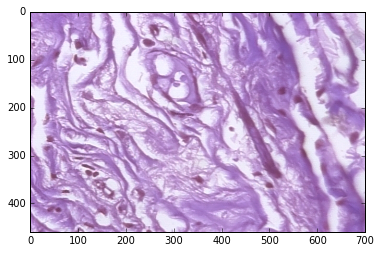

In [416]:
plt.imshow(df4['Image'].iloc[1504]),df4['Labels'].iloc[1504]

In [338]:
LR = 1e-3

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

convnet = input_data(shape=[None, 700,460, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='sigmoid')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [429]:
X = np.array([i[0] for i in train])
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test])
test_y = [i[1] for i in test]

In [433]:
X1 = np.array(X)
Y1 = np.array(Y)

test_x1 = np.array(test_x)
test_y1 = np.array(test_y)

X1.shape, Y1.shape, test_x1.shape, test_y1.shape, X1.dtype, Y1.dtype

((1013,), (1013, 2), (1000,), (1000, 2), dtype('O'), dtype('int64'))

In [502]:
model.fit({'input': X1}, {'targets': Y1}, n_epoch=3, validation_set=({'input': test_x1}, {'targets': test_y1}), 
          snapshot_step=500,show_metric=True)

---------------------------------
Run id: KLGIN2
Log directory: log/
---------------------------------
Training samples: 4052
Validation samples: 4000
--


ValueError: setting an array element with a sequence.